## Implementing a Linear Regression Model

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, mutual_info_regression
import seaborn as sns

# Load dataset
pp_weather_df = pd.read_csv("pp_weather.csv")

pp_weather_df.head()

,precipitation,temp_max,temp_min,wind,month,year,day,day_of_week,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,2012,1,6,1,0,0,0,0
1,10.9,10.6,2.8,4.5,1,2012,2,0,0,0,1,0,0
2,0.8,11.7,7.2,2.3,1,2012,3,1,0,0,1,0,0
3,20.3,12.2,5.6,4.7,1,2012,4,2,0,0,1,0,0
4,1.3,8.9,2.8,6.1,1,2012,5,3,0,0,1,0,0


In [26]:
# Define features (X) and target variable (y)
X = pp_weather_df.drop(columns=['temp_max'])  
y = pp_weather_df['temp_max'] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a model with scikit-learn
linreg = LinearRegression()

# Fit the data into the model
linreg.fit(X_train, y_train)

# Make predictions using the X set
y_pred = linreg.predict(X_test)

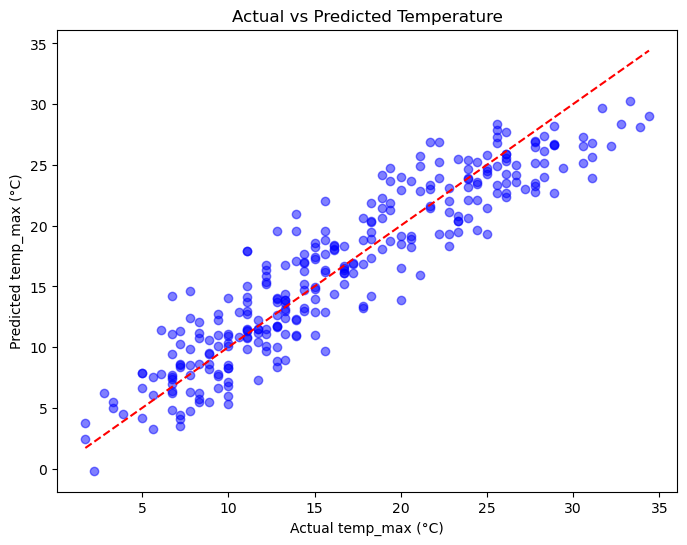

In [27]:
# Scatter Plot: Actual vs Predicted Temperature
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # Ideal Fit Line
plt.xlabel("Actual temp_max (°C)")
plt.ylabel("Predicted temp_max (°C)")
plt.title("Actual vs Predicted Temperature")
plt.show()

## Evaluation of the Linear Regression Model

In [28]:
# Compute standard regression evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("=== Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

=== Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 8.2393
Root Mean Squared Error (RMSE): 2.8704
Mean Absolute Error (MAE): 2.3222
R-squared (R2): 0.8552


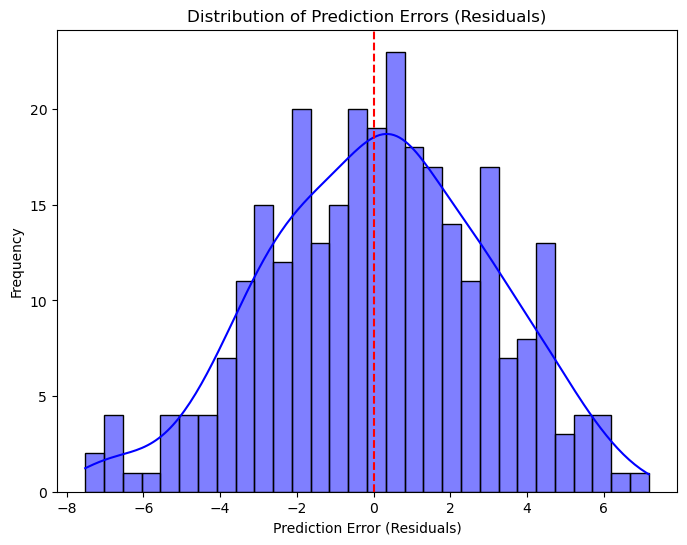

In [29]:
# Residuals (Error Distribution Plot)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")  # Reference line at 0 error
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors (Residuals)")
plt.show()


## Determining Feature Importance

In [30]:
# Split the data into features and target
X = pp_weather_df.drop(columns=['temp_max'])  
y = pp_weather_df['temp_max']

# Compute feature importance scores
f_scores, _ = f_regression(X, y)
mi_scores = mutual_info_regression(X, y)

# Create a dataframe to store feature importance and sort the dataframe by F-score
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_scores,
    'Mutual Information': mi_scores
}).sort_values(by='F-Score', ascending=False)

print(feature_importance_df)


            Feature      F-Score  Mutual Information
1          temp_min  4798.160272            0.809372
11      weather_sun   297.096492            0.113355
9      weather_rain   216.053702            0.157340
0     precipitation    80.414883            0.116586
10     weather_snow    60.204482            0.022773
2              wind    40.760044            0.058303
3             month    35.535733            0.653875
4              year    18.701868            0.000000
5               day     2.382406            0.000000
7   weather_drizzle     0.267443            0.000000
8       weather_fog     0.203442            0.000000
6       day_of_week     0.016577            0.000000


## Training the Optimized Linear Regression Model

In [31]:
# Select important features
selected_features = ['temp_min', 'weather_sun', 'weather_rain', 'precipitation', 'weather_snow', 'wind', 'month']
X_selected = pp_weather_df[selected_features]
y = pp_weather_df['temp_max']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the Optimized Linear Regression Model
linreg_optimized = LinearRegression()
linreg_optimized.fit(X_train, y_train)

# Make Predictions on Test Data
y_pred_optimized = linreg_optimized.predict(X_test)

# Compute metrics for the linear regression model: score, r2, mse, rmse, mae
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Store the Results in a Dictionary
improved_results = {
    "Mean Squared Error (MSE)": mse_optimized,
    "Root Mean Squared Error (RMSE)": rmse_optimized,
    "Mean Absolute Error (MAE)": mae_optimized,
    "R² Score": r2_optimized
}

# Print the Optimized Model’s Performance
print("=== Optimized Linear Regression Model Evaluation ===")
print(f"Mean Squared Error (MSE): {mse_optimized:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.4f}")
print(f"Mean Absolute Error (MAE): {mae_optimized:.4f}")
print(f"R² Score: {r2_optimized:.4f}")


=== Optimized Linear Regression Model Evaluation ===
Mean Squared Error (MSE): 8.2455
Root Mean Squared Error (RMSE): 2.8715
Mean Absolute Error (MAE): 2.3287
R² Score: 0.8551
